In [267]:
from qiskit import *
import numpy as np
from qiskit.visualization import plot_histogram
import qiskit.tools.jupyter
import matplotlib.pyplot as plt

In [268]:
sim = Aer.get_backend('qasm_simulator')

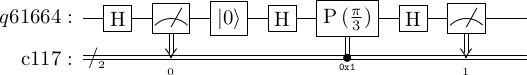

In [269]:
q = QuantumRegister(1)
c = ClassicalRegister(2)

qc0 = QuantumCircuit(q, c)
qc0.h(q[0])
qc0.measure(q[0], c[0])
qc0.reset(q[0])
qc0.h(q[0])
qc0.p(np.pi/3, q[0]).c_if(c,1)
qc0.h(q[0])
qc0.measure(q[0],c[1])

qc0.draw()

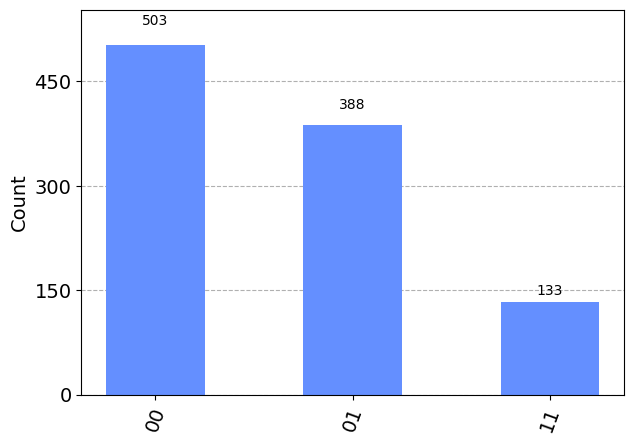

In [270]:
count0 = execute(qc0, sim).result().get_counts()
plot_histogram(count0)

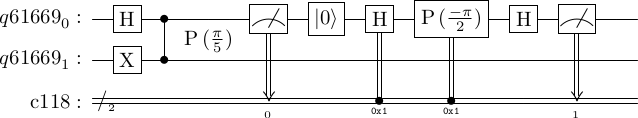

In [271]:
q = QuantumRegister(2)
c = ClassicalRegister(2)

qc1 = QuantumCircuit(q,c)
qc1.h(q[0])
qc1.x(q[1])
qc1.cp(np.pi/5, q[0], q[1])
qc1.measure(q[0], c[0])
qc1.reset(q[0])

###### your code goes here #####
qc1.h(q[0]).c_if(c,1)
qc1.p(-np.pi/2, q[0]).c_if(c,1)


##########################
qc1.h(q[0])
qc1.measure(q[0],c[1])

qc1.draw()

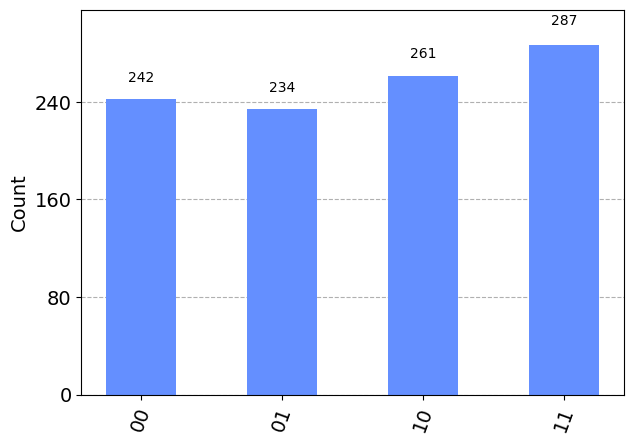

In [272]:
count1 = execute(qc1, sim).result().get_counts()
plot_histogram(count1)

x_3 = 1


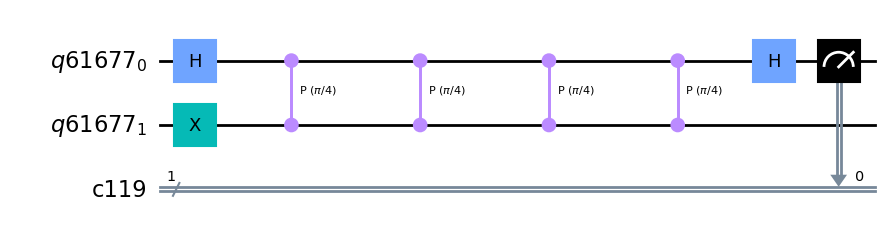

In [273]:
q = QuantumRegister(2)
c = ClassicalRegister(1)

T_x3 = QuantumCircuit(q,c)

########## your code goes here #######

##1 Initialization
T_x3.h(q[0])
# eigenstate of T gate is |0> and |1>
T_x3.x(q[1])


##2 Apply control-U operator as many times as needed to get the least significant phase bit
T_x3.cp(np.pi/4, q[1], q[0])
T_x3.cp(np.pi/4, q[1], q[0])
T_x3.cp(np.pi/4, q[1], q[0])
T_x3.cp(np.pi/4, q[1], q[0])


##3 measure the anscillar qubit in x-basis
T_x3.h(q[0])
T_x3.measure(q[0], c[0])



########## Simulate the circuit and assign the output value to the variable 'x_3' 
job = execute(T_x3, sim, shots=1, memory=True)
x_3 = int(job.result().get_memory()[0])

print('x_3 = {}'.format(x_3))
T_x3.draw('mpl')

x_2 = 0


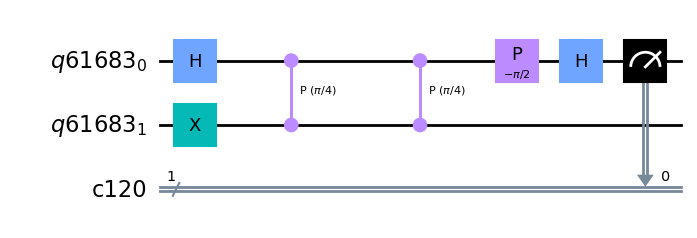

In [274]:
q = QuantumRegister(2)
c = ClassicalRegister(1)

T_x2 = QuantumCircuit(q,c)

########### your code goes here ##########

##1 Initialization
T_x2.h(q[0])
# eigenstate of T gate is |0> and |1>
T_x2.x(q[1])


##2 Apply control-U operator as many times as needed 
T_x2.cp(np.pi/4, q[1], q[0])
T_x2.cp(np.pi/4, q[1], q[0])

##3 phase correction
T_x2.p(-np.pi/2*x_3, q[0])



##4 measure the anscillar qubit in x-basis
T_x2.h(q[0])
T_x2.measure(q[0], c[0])




######## Simulate the circuit and assign the output value to the variable 'x_2' 
job = execute(T_x2, sim, shots=1, memory=True)
x_2 = int(job.result().get_memory()[0])

print('x_2 = {}'.format(x_2))
T_x2.draw('mpl')

x_1 = 0


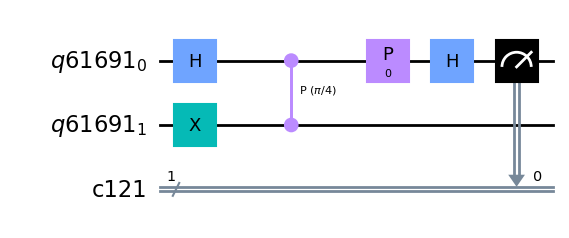

In [275]:
q = QuantumRegister(2)
c = ClassicalRegister(1)

T_x1 = QuantumCircuit(q,c)

########### your code goes here #########

##1 Initialization
T_x1.h(q[0])
# eigenstate of T gate is |0> and |1>
T_x1.x(q[1])

##2 Apply control-U operator as many times as needed to get the least significant phase bit
T_x1.cp(np.pi/4, q[1], q[0])


##3 phase correction
T_x1.p(-np.pi/2*x_2, q[0])


##4 measure the anscillar qubit in x-basis
T_x1.h(q[0])
T_x1.measure(q[0], c[0])



########## Simulate the circuit and assign the output value to the variable 'x_1' 
job = execute(T_x1, sim, shots=1, memory=True)
x_1 = int(job.result().get_memory()[0])

print('x_1 = {}'.format(x_1))
T_x1.draw('mpl')

In [276]:
T_phase_bits = '{}{}{}'.format(x_1, x_2, x_3) 
T_phase_bits == '001'

True

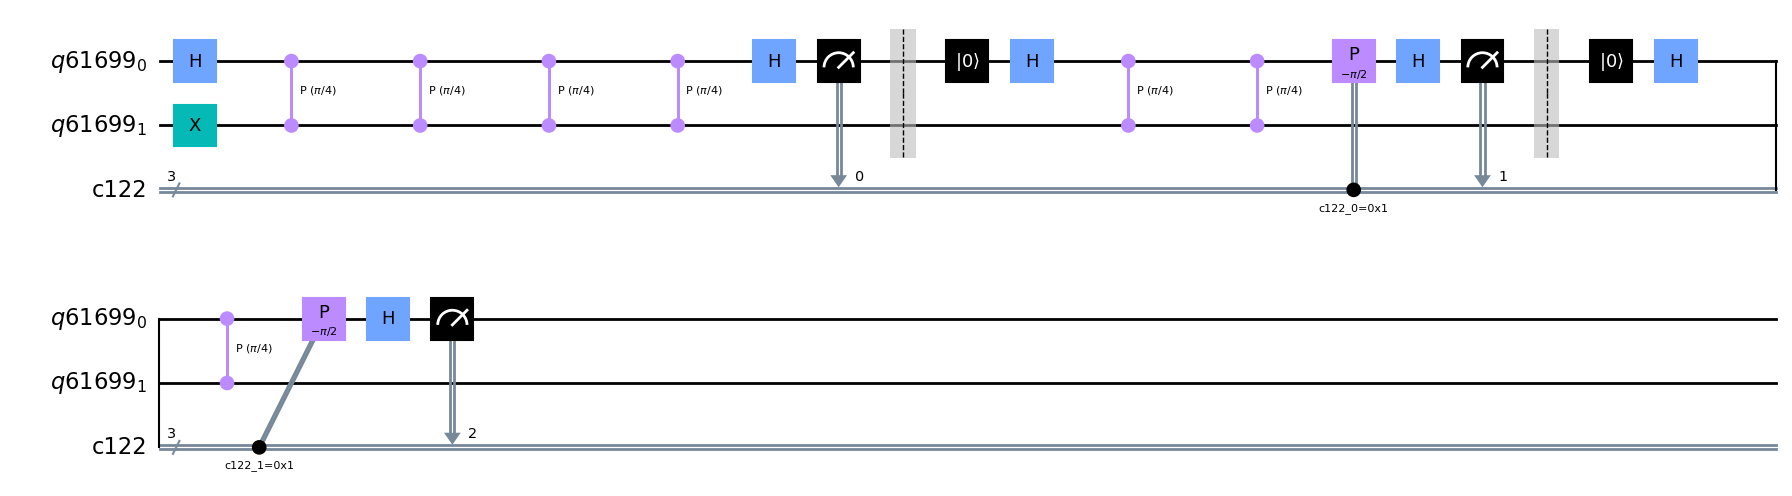

In [277]:
##### your code goes here ######
q = QuantumRegister(2)
c = ClassicalRegister(3)

qc_T = QuantumCircuit(q,c)

# First step
##1 Initialization
qc_T.h(q[0])
qc_T.x(q[1])
##2 Apply control-U operator as many times as needed to get the least significant phase bit
qc_T.cp(np.pi/4, q[1], q[0])
qc_T.cp(np.pi/4, q[1], q[0])
qc_T.cp(np.pi/4, q[1], q[0])
qc_T.cp(np.pi/4, q[1], q[0])
##3 measure the anscillar qubit in x-basis
qc_T.h(q[0])
qc_T.measure(q[0], c[0])

# Second step
qc_T.barrier()
qc_T.reset(q[0])
##1 Initialization
qc_T.h(q[0])
##2 Apply control-U operator as many times as needed 
qc_T.cp(np.pi/4, q[1], q[0])
qc_T.cp(np.pi/4, q[1], q[0])
##3 phase correction
qc_T.p(-np.pi/2, q[0]).c_if(c[0], 1)
##4 measure the anscillar qubit in x-basis
qc_T.h(q[0])
qc_T.measure(q[0], c[1])

# Third step
qc_T.barrier()
qc_T.reset(q[0])
##1 Initialization
qc_T.h(q[0])
##2 Apply control-U operator as many times as needed to get the least significant phase bit
qc_T.cp(np.pi/4, q[1], q[0])
##3 phase correction
qc_T.p(-np.pi/2, q[0]).c_if(c[1], 1)
##4 measure the anscillar qubit in x-basis
qc_T.h(q[0])
qc_T.measure(q[0], c[2])

################
qc_T.draw(output='mpl')

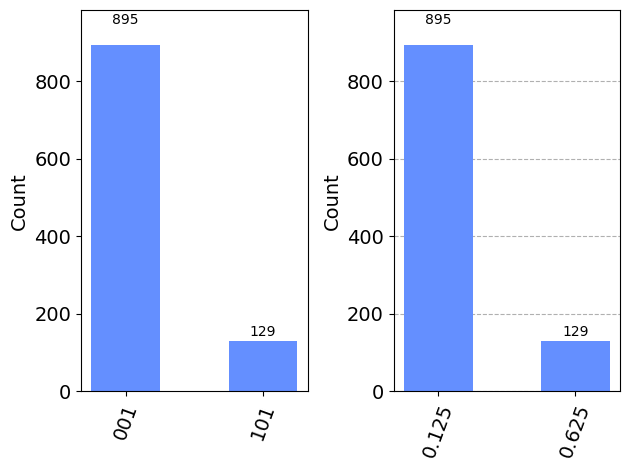

In [278]:
count0 = execute(qc_T, sim).result().get_counts()
n=3
key_new = [str(int(key,2)/2**n) for key in list(count0.keys())]
count1 = dict(zip(key_new, count0.values()))

fig, ax = plt.subplots(1,2)
plot_histogram(count0, ax=ax[0])
plot_histogram(count1, ax=ax[1])
plt.tight_layout()

In [279]:
## your answer goes here
n = 4

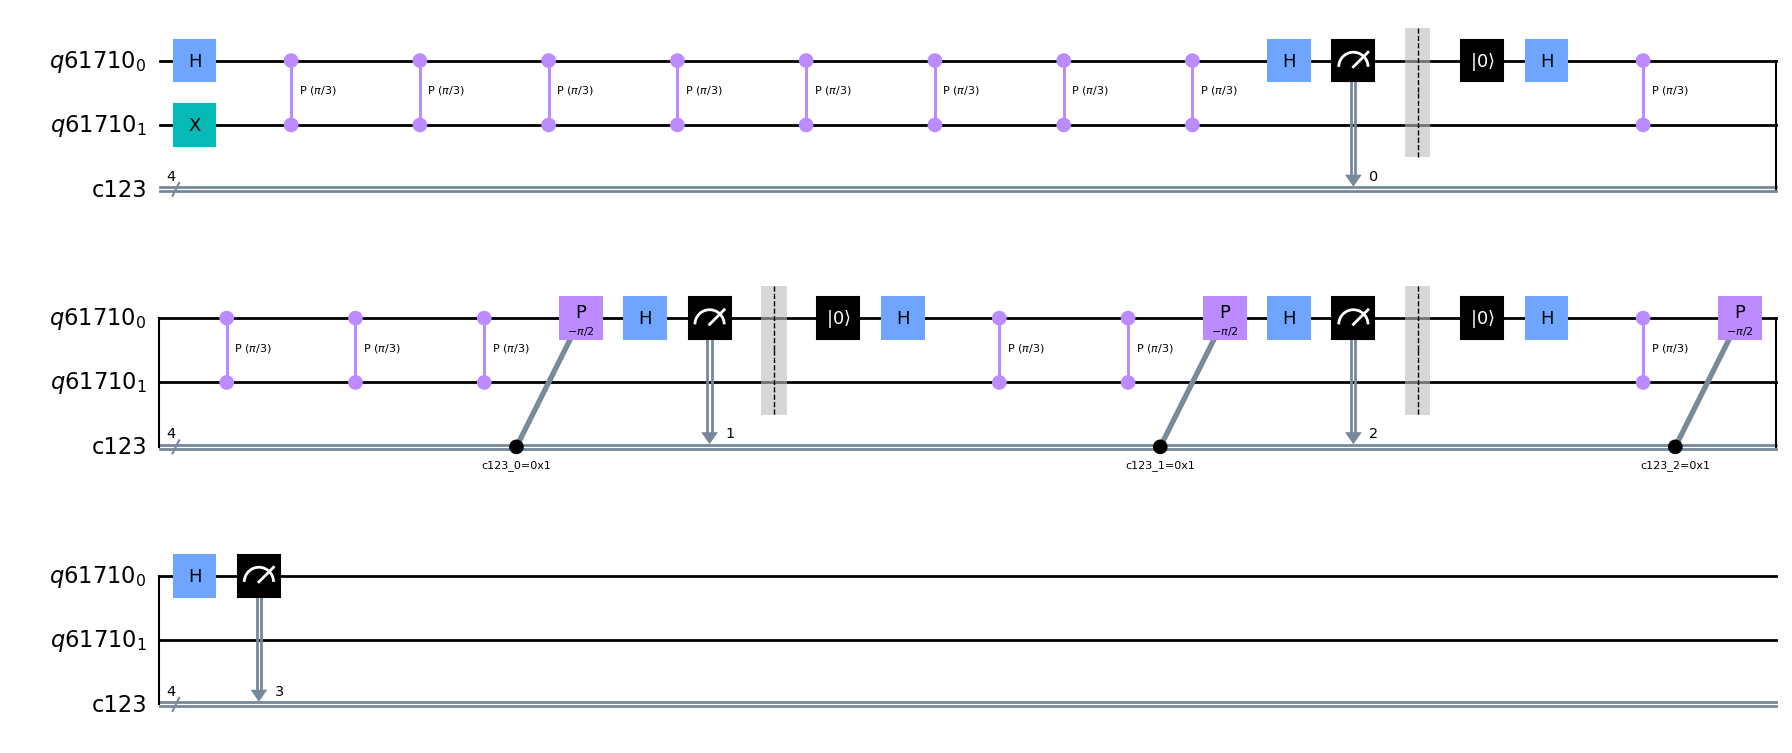

In [280]:
q = QuantumRegister(2)
c = ClassicalRegister(n)

IPE = QuantumCircuit(q,c)

########## your code goes here ############
IPE.h(q[0])
IPE.x(q[1])

for _ in range(2**(n-1)):
    IPE.cp(np.pi/3, q[1], q[0])

IPE.h(q[0])
IPE.measure(q[0], c[0])
IPE.barrier()

IPE.reset(q[0])
IPE.h(q[0])

for _ in range(2**(n-2)):
    IPE.cp(np.pi/3, q[1], q[0])

IPE.p(-np.pi/2, q[0]).c_if(c[0], 1)

IPE.h(q[0])
IPE.measure(q[0], c[1])
IPE.barrier()

IPE.reset(q[0])
IPE.h(q[0])

for _ in range(2**(n-3)):
    IPE.cp(np.pi/3, q[1], q[0])

IPE.p(-np.pi/2, q[0]).c_if(c[1], 1)  
  
IPE.h(q[0])
IPE.measure(q[0], c[2])
IPE.barrier()

IPE.reset(q[0])
IPE.h(q[0])

for _ in range(2**(n-4)):
    IPE.cp(np.pi/3, q[1], q[0])
    
IPE.p(-np.pi/2, q[0]).c_if(c[2], 1)
    
IPE.h(q[0])
IPE.measure(q[0], c[3])

#####################
IPE.draw(output='mpl')

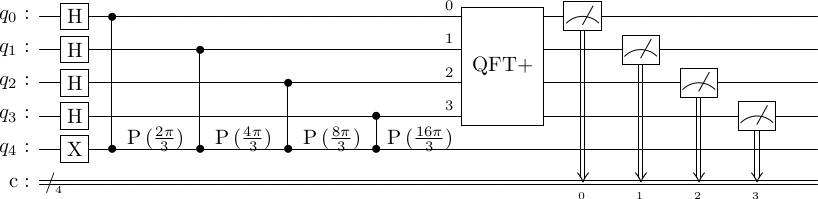

In [281]:
def qft(n):
    """Creates an n-qubit QFT circuit"""
    circuit = QuantumCircuit(n)
    def swap_registers(circuit, n):
        for qubit in range(n//2):
            circuit.swap(qubit, n-qubit-1)
        return circuit
    def qft_rotations(circuit, n):
        """Performs qft on the first n qubits in circuit (without swaps)"""
        if n == 0:
            return circuit
        n -= 1
        circuit.h(n)
        for qubit in range(n):
            circuit.cp(np.pi/2**(n-qubit), qubit, n)
        qft_rotations(circuit, n)
    
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit


# define the parameters
t, psi = 4, 1/3*np.pi*2

# building a circuit
QPE = QuantumCircuit(t+1,t)
QPE.h(range(t))
QPE.x(t)
for idx in range(t):
    QPE.cp(psi*2**idx, idx, t)
    
qft_dag = qft(t).to_gate().inverse()
qft_dag.label = 'QFT+'
QPE.append(qft_dag, range(t))
QPE.measure(range(t), range(t))

QPE.draw()

In [282]:
from qiskit.providers.fake_provider import FakeAthens
import qiskit.tools.jupyter

backend = FakeAthens()
backend

<FakeAthens('fake_athens')>

In [283]:
######## your code to transpile IPE circuit goes here ########
IPE_trans = transpile(IPE, backend, optimization_level=3)



#####################
print(IPE_trans.depth())

49


In [284]:
num = 500
QPE_trans = transpile([QPE]*num, backend, optimization_level=3)
QPE_trans_depth = np.array([QPE_trans[idx].depth() for idx in range(num)])
print(min(QPE_trans_depth), max(QPE_trans_depth))
best_arg = np.argmin(QPE_trans_depth)
QPE_trans_best = QPE_trans[best_arg]

74 77


In [285]:
from qiskit.providers.aer.noise import NoiseModel

In [289]:
noise_model = NoiseModel.from_backend(backend)
shots = 20000

counts = execute([IPE_trans, QPE_trans_best], sim).result().get_counts()

In [290]:
from qiskit.quantum_info import Statevector

QPE_exact = QuantumCircuit(t+1)
QPE_exact.h(range(t))
QPE_exact.x(t)
for idx in range(t):
    QPE_exact.cp(psi*2**idx, idx, t)
    
qft_dag = qft(t).to_gate().inverse()
qft_dag.label = 'QFT+'
QPE_exact.append(qft_dag, range(t))

#QPE_exact.draw('mpl')

state = Statevector.from_instruction(QPE_exact)
pmf = state.probabilities_dict(range(4))

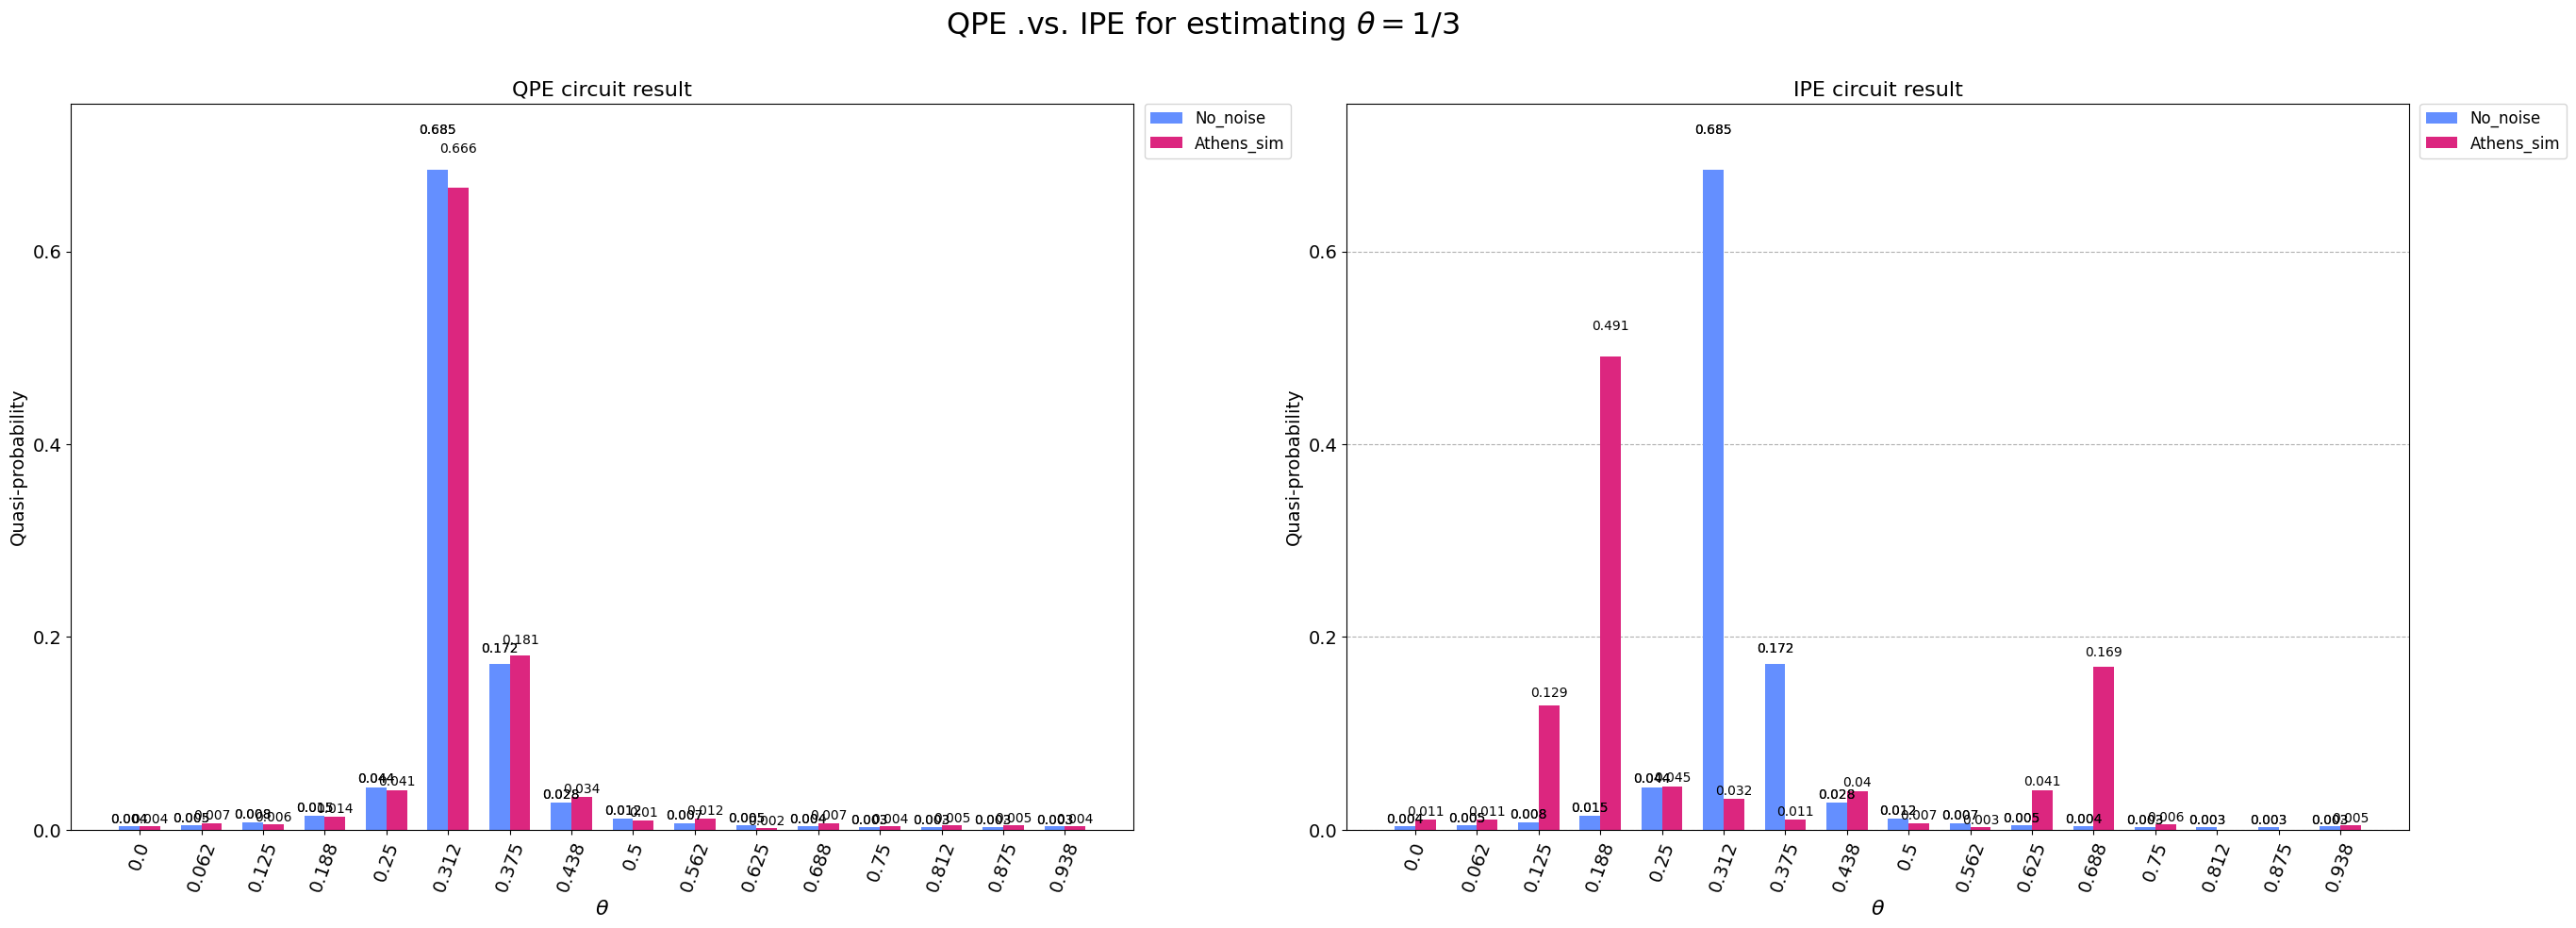

In [291]:
def count_new(count):
    phi_est = np.array([round(int(key, 2)/2**t, 3) for key in list(count.keys())])
    key_new = list(map(str, phi_est))
    count_new = dict(zip(key_new, count.values()))
    return count_new

pmf_new = count_new(pmf)
count_IPE = count_new(counts[0])
count_QPE = count_new(counts[1])

fig, ax = plt.subplots(1, 2, figsize=(32,10))
fig.suptitle('QPE .vs. IPE for estimating $\\theta=1/3$', fontsize=23)
plot_histogram([pmf_new, count_QPE], ax=ax[0], legend=['No_noise', 'Athens_sim'])
plot_histogram([pmf_new, count_IPE], ax=ax[1], legend=['No_noise', 'Athens_sim'])
ax[0].set_title('QPE circuit result', fontsize=16)
ax[0].set_xlabel('$\\theta$', fontsize=16)
ax[1].set_title('IPE circuit result', fontsize=16)
ax[1].set_xlabel('$\\theta$', fontsize=16)
plt.show()